In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')


##### this dataset captures comprehensive information on individuals' sleep habits, health metrics, and lifestyle factors, providing insights into how these elements interrelate and impact overall well-being. 
##### Each entry records data from a diverse sample of individuals, covering nightly sleep patterns, physical activity, diet, and various lifestyle factors. 
##### The dataset is ideal for analyzing correlations between sleep and health outcomes, as well as the effects of lifestyle on sleep quality and duration.

In [2]:
data=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
data.columns.to_list()

['Person ID',
 'Gender',
 'Age',
 'Occupation',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'BMI Category',
 'Blood Pressure',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder']

In [6]:
data.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [7]:
data['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [8]:
data['Sleep Disorder']=data['Sleep Disorder'].fillna('No Disorder')
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [9]:
data=data.drop(['Person ID','Sleep Duration'],axis=1)
data

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Sales Representative,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# EDA

In [10]:
gender=data.Gender.value_counts()
gender

Gender
Male      189
Female    185
Name: count, dtype: int64

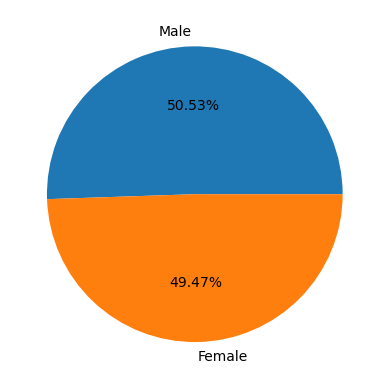

In [11]:
plt.pie(gender,labels=['Male','Female'],autopct='%.2f%%')
plt.show()

Text(0, 0.5, 'count')

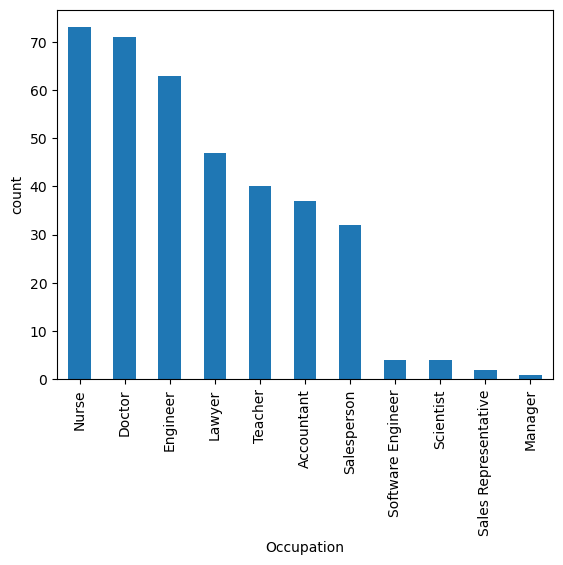

In [12]:
data['Occupation'].value_counts().plot.bar()
plt.xlabel('Occupation')
plt.ylabel('count')

In [13]:
##BMI Category

In [14]:
BMI=data['BMI Category'].value_counts()
BMI

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

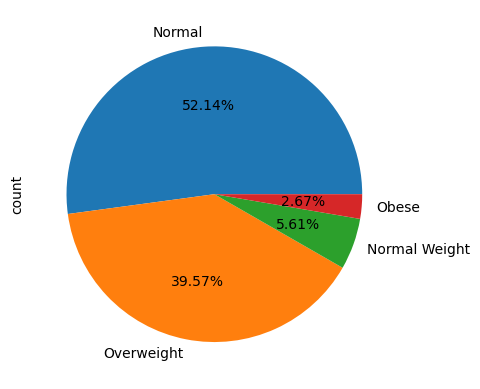

In [15]:
data['BMI Category'].value_counts().plot.pie(autopct='%.2f%%')
plt.show

<Axes: xlabel='Quality of Sleep', ylabel='Heart Rate'>

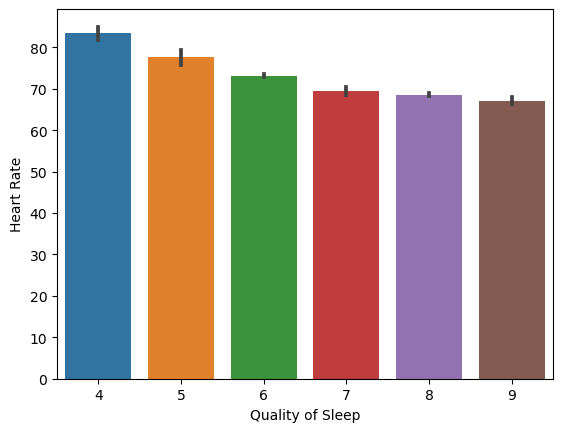

In [16]:
sns.barplot(x=data['Quality of Sleep'],y=data['Heart Rate'])

<Axes: xlabel='Stress Level', ylabel='Blood Pressure'>

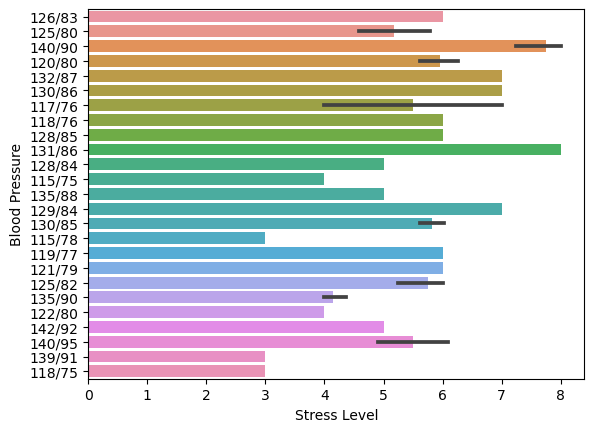

In [17]:
sns.barplot(x=data['Stress Level'],y=data['Blood Pressure'],data=data)

Text(0, 0.5, 'Count')

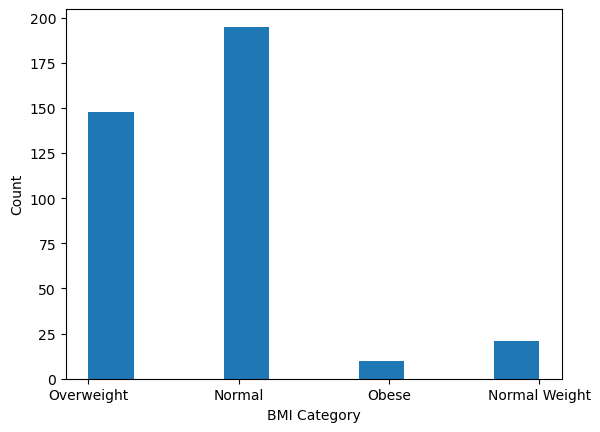

In [18]:
data['BMI Category'].hist()
plt.grid()
plt.xlabel('BMI Category')
plt.ylabel('Count')

In [19]:
data

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6,42,6,Overweight,126/83,77,4200,No Disorder
1,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,No Disorder
2,Male,28,Doctor,6,60,8,Normal,125/80,75,10000,No Disorder
3,Male,28,Sales Representative,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


# Model training

In [21]:
le=LabelEncoder()
data.Occupation=le.fit_transform(data.Occupation)
data['BMI Category']=le.fit_transform(data['BMI Category'])
data['Sleep Disorder']=le.fit_transform(data['Sleep Disorder'])
data.Gender=le.fit_transform(data.Gender)
data['Blood Pressure']=le.fit_transform(data['Blood Pressure'])

In [22]:
x=data.drop('Sleep Disorder',axis=1)
y=data['Sleep Disorder']


In [23]:
x

,Gender,Age,Occupation,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,27,9,6,42,6,3,11,77,4200
1,1,28,1,6,60,8,0,9,75,10000
2,1,28,1,6,60,8,0,9,75,10000
3,1,28,6,4,30,8,2,22,85,3000
4,1,28,6,4,30,8,2,22,85,3000
...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,9,75,3,3,23,68,7000
370,0,59,5,9,75,3,3,23,68,7000
371,0,59,5,9,75,3,3,23,68,7000
372,0,59,5,9,75,3,3,23,68,7000


In [24]:
y

0      1
1      1
2      1
3      2
4      2
      ..
369    2
370    2
371    2
372    2
373    2
Name: Sleep Disorder, Length: 374, dtype: int32

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=55)

In [26]:
#cross validation

In [65]:
log_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=8)
tree_score=cross_val_score(DecisionTreeClassifier(max_depth=3),X=x,y=y,cv=8)
kn_score=cross_val_score(KNeighborsClassifier(n_neighbors=40),X=x,y=y,cv=8)
forest_score=cross_val_score(RandomForestClassifier(n_estimators=300,random_state=30),X=x,y=y,cv=8)
SVC_score=cross_val_score(SVC(),X=x,y=y,cv=8)
Gauss_score=cross_val_score(GaussianNB(),X=x,y=y,cv=8)
ADA_score=cross_val_score(AdaBoostClassifier(n_estimators=55,learning_rate=0.3,random_state=50),X=x,y=y,cv=8)
Gradiant_score=cross_val_score(GradientBoostingClassifier(),X=x,y=y,cv=8)


In [66]:
print(np.mean(log_score))
print(np.mean(tree_score))
print(np.mean(kn_score))
print(np.mean(forest_score))
print(np.mean(SVC_score))
print(np.mean(Gauss_score))
print(np.mean(ADA_score))
print(np.mean(Gradiant_score))

0.8304810360777057
0.8876618871415356
0.6895235892691952
0.8052150786308973
0.6572617946345976
0.8795097132284921
0.8579440333024977
0.7889107308048103


In [72]:
model=DecisionTreeClassifier()



In [73]:
p=model.get_params()
p

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [90]:
gscv=GridSearchCV(model,{'max_depth':[2,3,4,5,6,7,None]},cv=4,return_train_score=True)
gscv.fit(x_train,y_train)


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, None]},
             return_train_score=True)

In [3]:
gs_data=gscv.cv_results_


NameError: name 'gscv' is not defined

In [2]:
df=pd.DataFrame(gs_data)
df

NameError: name 'pd' is not defined

In [100]:
gscv.best_score_

0.8964285714285715

In [101]:
gscv.best_params_

{'max_depth': 4}

In [103]:
y_pred=gscv.predict(x_test)

In [105]:
y_pred

array([1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 0,
       2, 1, 2, 1, 1, 1])

In [104]:
df1=pd.DataFrame({'True value': y_test,"predicted value": y_pred})
df1

,True value,predicted value
118,1,1
304,2,2
142,1,1
205,1,1
269,2,2
...,...,...
91,1,1
281,2,2
12,1,1
60,1,1


In [106]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[17,  2,  2],
       [ 2, 54,  0],
       [ 1,  0, 16]], dtype=int64)

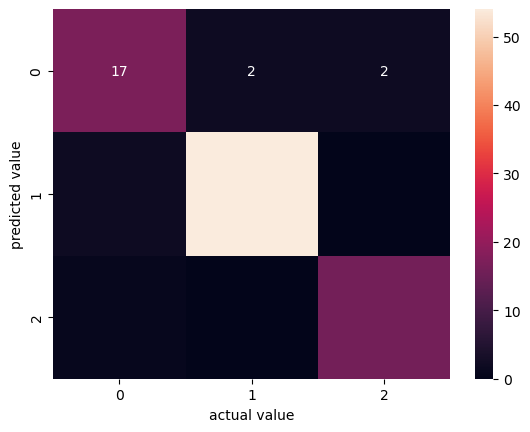

In [107]:
sns.heatmap(cm,annot=True)
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.96      0.96      0.96        56
           2       0.89      0.94      0.91        17

    accuracy                           0.93        94
   macro avg       0.90      0.90      0.90        94
weighted avg       0.93      0.93      0.93        94



# conclusion

##### The Sleep Health and Lifestyle Dataset provides valuable insights into how sleep habits, health metrics, and lifestyle factors like diet and exercise are connected.
##### By analyzing patterns in sleep quality, duration, and associated health and lifestyle data, this dataset helps researchers understand what influences good sleep and how poor sleep can affect health.

In [109]:
data['Sleep Disorder'].value_counts()



Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64

In [110]:
data['Sleep Disorder'].unique()

array([1, 2, 0])

<Axes: ylabel='count'>

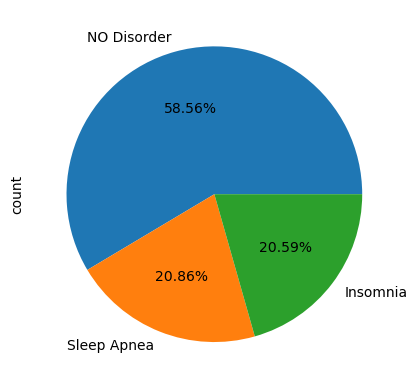

In [116]:
data['Sleep Disorder'].value_counts().plot.pie(autopct='%.2f%%',labels=['NO Disorder','Sleep Apnea','Insomnia'])


##### Sleep Apnea is when breathing stops and starts repeatedly during sleep.
##### This can happen because the airway gets blocked or due to issues with brain signals.
##### People with sleep apnea may snore loudly or wake up gasping for air, and often feel tired during the day. It can raise the risk of heart problems and other health issues. 
##### Treatments include using a CPAP machine to keep airways open or making lifestyle changes.

##### Insomnia is trouble falling or staying asleep.
##### It’s often linked to stress, anxiety, or an irregular schedule.
##### People with insomnia may feel tired, irritable, and find it hard to focus. Chronic insomnia can affect mental and physical health. 
##### Treatment includes good sleep habits, relaxation techniques, and sometimes therapy.

